## Xyz Social Media Campaign Analysis
An analysis of the targeting variables that result in the most conversions. 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #import matplotlib and seaborn for visualizations
import seaborn as sns
import statsmodels.api as sm #import stats for regression 

**The Question**
This dataset is from an anonymous organization's social media campaigns but for the purpose of this project, I have called the company Xyz Marketing. The company have run three social media campaigns recently and require a data analyst to evaluate the success of the campaigns. 

The question: What targeting is the most successful in promoting Approved Conversions? And how can this analysis be used to guide the success of future campaigns?

My hypothesis: The campaign spend is a key factor in attracting with impressions, followed by targeting variables.

**Variable Descriptions**\
xyz_campaign_id - the internal company campaign identifier\
ad_id - The Facebook ad id \
fb_campaign_id - The Facebook campaign identifier, multiple ads can be connected to a FB campaign.\
age - age targeting\
gender - gender targeting\
interest - interest targeting, Facebook code specific to a person's interest as displayed on their profile.\
impressions - number of times ad is shown\
clicks - the number of clicks on ad\
spent -  amount paid to Facebook by Xyz Marketing to show the ad.\
total conversion - number of people who inquired about the product after seeing ad (impressions).\
approved conversion - number of people who bought the product after being targeted and seeing the ad. 

https://www.kaggle.com/loveall/clicks-conversion-tracking

In [4]:
data = pd.read_csv('KAG_conversion_data.csv') #load the dataframe

In [5]:
data.head() #Look at the columns and first rows of data 

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Data Overview and Analysis

Analysis below demonstrates these data details:\
Looking at the grouping of this data,\
3 campaigns for the company,\
1143 unique ad ids,\ 
691 Facebook Campaign Ids\
\
There are no null values throughout the dataset. With 1,143 rows and 11 columns and analysis of the shape of multiple columns, I can see that each row represents one unique ad and the targeting, money spent and the touchpoints (impressions, clicks, total conversions) and the conversion (if someone targeting by the ad purchased). 


In [6]:
data.describe() # Thouroughly investigate the date set using describe

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
data.shape #look at the shape of the data

(1143, 11)

In [8]:
data.isna().any() #look for any null values

ad_id                  False
xyz_campaign_id        False
fb_campaign_id         False
age                    False
gender                 False
interest               False
Impressions            False
Clicks                 False
Spent                  False
Total_Conversion       False
Approved_Conversion    False
dtype: bool

In [9]:
#Look at the size of columns to determine how many unique variables are in each 
data.groupby('interest').size()
data.groupby('xyz_campaign_id').size()
data.groupby('ad_id').size()
data.groupby('Approved_Conversion').size()
data.groupby('fb_campaign_id').size()
data.groupby('interest').size()

interest
2       25
7       24
10      85
15      51
16     140
18      43
19      32
20      49
21      36
22      33
23      23
24      24
25      26
26      41
27      60
28      51
29      77
30      25
31      25
32      33
36      21
63      46
64      48
65      19
66      11
100      6
101      7
102      7
103      5
104      5
105      7
106      5
107      8
108      7
109      6
110      8
111      6
112      7
113      6
114      5
dtype: int64

<AxesSubplot:xlabel='age'>

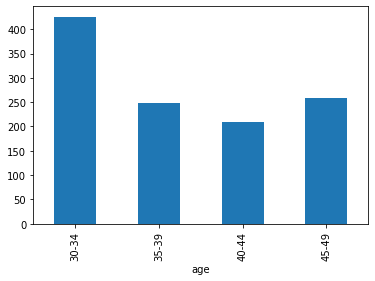

In [10]:
#The greatest number of ads were targeted to the 30-34 age group
data.groupby('age').size().plot(kind='bar') #groupby and visualize the number of customers by age

In [11]:
data['Spent'].sum()/data['Approved_Conversion'].sum() #calculation for the cost per conversion

54.40707132363763

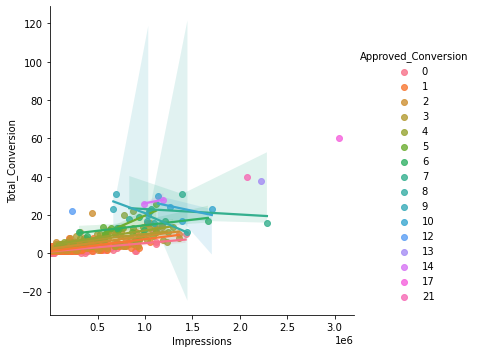

In [12]:
#plotting the relationship between impressions, total conversions and approved conversions
sns.lmplot(data=data, x='Impressions', y='Total_Conversion', hue = 'Approved_Conversion') #to get trend line use lmplot

<AxesSubplot:xlabel='Approved_Conversion', ylabel='Total_Conversion'>

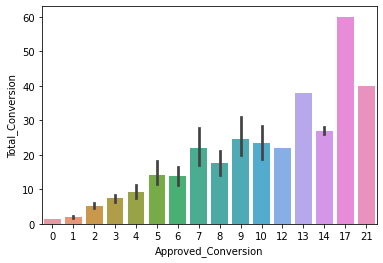

In [13]:
#A clearer bar plot to look at the total conversions and approved relationship 
#not all people who inquire about the product purchase, and those who purchase do not always inquire first
sns.barplot(data=data, x= 'Approved_Conversion', y= 'Total_Conversion' )

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

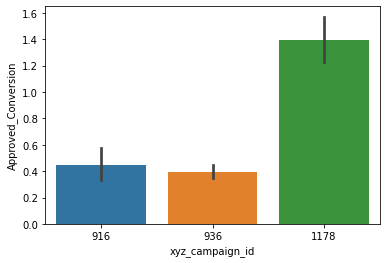

In [14]:
#Number of approved conversions per campaign 
sns.barplot(data=data, x= 'xyz_campaign_id', y= 'Approved_Conversion' )

<AxesSubplot:xlabel='Approved_Conversion', ylabel='Spent'>

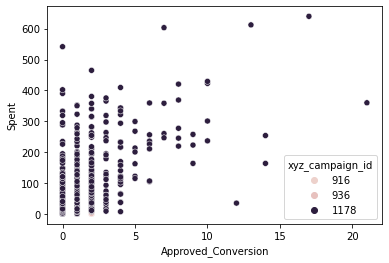

In [15]:
#Looking at the amount spent on each campaign and the approved conversions. 
#This slight look indicates that there maybe be some correlation with a greater value in ad spends and conversions. 
sns.scatterplot(data=data, x='Approved_Conversion', y='Spent', hue = 'xyz_campaign_id')

#### Data Cleaning

To determine which aspects of the targeting and campaign milestones have a relation to Approved Conversions I will be using regression models.\
But to undertake this task I used One Hot Encoding on the Age,Gender and interest columns.
I also renamed some columns to be a bit more descriptive of their content. 

Overall this was a rather clean dataset and didn't require a greatdeal of cleaning. 


In [16]:
age = pd.get_dummies(data['age']) #Convert categorical variable into indicator variables for age

In [17]:
interest = pd.get_dummies(data['interest']) #Convert categorical variable into indicator variables for interestv targeting

In [18]:
gender = pd.get_dummies(data['gender']) #Convert categorical variable into indicator variables for gender

In [19]:
data_clean = pd.concat([age, data, gender, interest], axis=1)

In [20]:
#drop the columns that no longer are needed due to one hot encoding. 
#drop the Facebook campaign Ids and ad Ids as these are unique identifiers and could affect the modeling. 
data_clean.drop(['age', 'gender', 'interest','fb_campaign_id','ad_id'], axis=1, inplace=True)

In [21]:
#Rename the columns to be more descriptive and age categories to not be confused with the categorical interest targeting 
data_clean.rename(columns={'Total_Conversion': 'Inquiry', '35-39': 'age 35-39', '30-34': 'age 30-34', '35-34': 'age 35-34', '40-44': 'age 40-44', '45-49': 'age 45-49' }, inplace=True)

In [22]:
data_clean = data_clean.round(2).astype(float) #change data types to flots

In [23]:
data_clean.dtypes

age 30-34              float64
age 35-39              float64
age 40-44              float64
age 45-49              float64
xyz_campaign_id        float64
Impressions            float64
Clicks                 float64
Spent                  float64
Inquiry                float64
Approved_Conversion    float64
F                      float64
M                      float64
2                      float64
7                      float64
10                     float64
15                     float64
16                     float64
18                     float64
19                     float64
20                     float64
21                     float64
22                     float64
23                     float64
24                     float64
25                     float64
26                     float64
27                     float64
28                     float64
29                     float64
30                     float64
31                     float64
32                     float64
36      

### Answering the Data Question

When initially seeking to answer this data question using scikit-learn for regression modeling, it proved difficult due to the large data set. I was not able to determine in a certain way, which variables I could safely remove to improve the model.

I changed my order of analysis, by first adding regression modeling to determine correlations, then using those findings in regression modeling with scikit-learn.

In [24]:
#create a regression list of all columns in data, aside from those previously dropped. 
regression_data = data_clean[['age 30-34','age 35-39','age 40-44','age 45-49','xyz_campaign_id','Impressions','Clicks','Spent','Inquiry','Approved_Conversion','F','M',2,7,10,15,16,                    18,
                          19,                    20,                    21,
                          22,                    23,                    24,
                          25,                    26,                    27,
                          28,                    29,                    30,
                          31,                    32,                    36,
                          63,                    64,                    65,
                          66,                   100,                   101,
                         102,                   103,                   104,
                         105,                   106,                   107,
                         108,                   109,                   110,
                         111,                   112,                   113,
                         114,]] 


In [25]:
#display the correlations between the values
regression_data[['age 30-34','age 35-39','age 40-44','age 45-49','xyz_campaign_id','Impressions','Clicks','Spent','Inquiry','Approved_Conversion','F','M',2,7,10,15,16,                    18,
                          19,                    20,                    21,
                          22,                    23,                    24,
                          25,                    26,                    27,
                          28,                    29,                    30,
                          31,                    32,                    36,
                          63,                    64,                    65,
                          66,                   100,                   101,
                         102,                   103,                   104,
                         105,                   106,                   107,
                         108,                   109,                   110,
                         111,                   112,                   113,
                         114,]].corr()


,age 30-34,age 35-39,age 40-44,age 45-49,xyz_campaign_id,Impressions,Clicks,Spent,Inquiry,Approved_Conversion,...,105,106,107,108,109,110,111,112,113,114
age 30-34,1.000000,-0.405751,-0.365691,-0.417224,-0.117677,-0.066877,-0.150856,-0.138037,0.086600,0.095685,...,-0.014122,-0.023675,-0.021305,-0.037315,-0.030954,-0.021305,-0.005915,-0.014122,-0.030954,-0.051093
age 35-39,-0.405751,1.000000,-0.249737,-0.284930,0.048032,-0.028549,-0.044296,-0.039705,-0.038931,-0.033133,...,-0.014115,-0.002729,0.006727,0.013091,0.020507,0.006727,-0.008866,0.013091,0.020507,0.029433
age 40-44,-0.365691,-0.249737,1.000000,-0.256799,0.065182,0.002822,0.028765,0.020909,-0.038657,-0.036732,...,0.020673,0.037018,0.014367,0.020673,-0.003200,0.014367,0.028063,0.020673,-0.003200,0.002785
age 45-49,-0.417224,-0.284930,-0.256799,1.000000,0.028329,0.102743,0.191246,0.179187,-0.025933,-0.043914,...,0.011085,-0.004211,0.004693,0.011085,0.018522,0.004693,-0.010399,-0.015702,0.018522,0.027456
xyz_campaign_id,-0.117677,0.048032,0.065182,0.028329,1.000000,0.495273,0.469729,0.476689,0.346684,0.284968,...,0.071423,0.060310,0.076388,0.071423,0.066095,0.076388,0.066095,0.071423,0.066095,0.060310
Impressions,-0.066877,-0.028549,0.002822,0.102743,0.495273,1.000000,0.948514,0.970386,0.812838,0.684249,...,0.048397,0.027935,0.100311,0.052237,0.072032,0.031583,0.014349,0.036496,0.027503,0.005619
Clicks,-0.150856,-0.044296,0.028765,0.191246,0.469729,0.948514,1.000000,0.992906,0.694632,0.559526,...,0.043239,0.038476,0.068627,0.033182,0.079127,0.018063,0.012701,0.020759,0.006953,0.005606
Spent,-0.138037,-0.039705,0.020909,0.179187,0.476689,0.970386,0.992906,1.000000,0.725379,0.593178,...,0.037213,0.034389,0.061888,0.029261,0.070753,0.013345,0.008709,0.016043,0.004831,0.003940
Inquiry,0.086600,-0.038931,-0.038657,-0.025933,0.346684,0.812838,0.694632,0.725379,1.000000,0.864034,...,0.030053,0.016925,0.098712,0.037560,0.056370,0.030804,0.034758,0.082600,0.021251,-0.006739
Approved_Conversion,0.095685,-0.033133,-0.036732,-0.043914,0.284968,0.684249,0.559526,0.593178,0.864034,1.000000,...,-0.003926,0.002137,0.075209,0.002531,0.016283,0.008748,0.030223,0.054180,0.009312,-0.005496


In [26]:
regression_data = regression_data.dropna() #drop any nulls


In [27]:
regression_data.shape #display the shape the data with dropped collumns 

(1143, 52)

In [28]:
#establish the dependent variable, approved conversions
dependent_vars = regression_data['Approved_Conversion'] 
#establish independent variables 
independent_vars = regression_data[['age 30-34','age 35-39','age 40-44','age 45-49','xyz_campaign_id','Impressions','Clicks','Spent','Inquiry','F','M',2,7,10,15,16,                    18,
                          19,                    20,                    21,
                          22,                    23,                    24,
                          25,                    26,                    27,
                          28,                    29,                    30,
                          31,                    32,                    36,
                          63,                    64,                    65,
                          66,                   100,                   101,
                         102,                   103,                   104,
                         105,                   106,                   107,
                         108,                   109,                   110,
                         111,                   112,                   113,
                         114,]] 

independent_vars['constant'] = np.ones((independent_vars.shape[0],)) #add a constant column for the regression

#create linear regression class, with the data
lin_reg = sm.OLS(dependent_vars, independent_vars) # initializing sqs 
reg_results = lin_reg.fit() #fit the model to the data using the fit method
print(reg_results.summary())

                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.760
Method:                  Least Squares   F-statistic:                     76.44
Date:                 Thu, 16 Dec 2021   Prob (F-statistic):          5.27e-312
Time:                         16:37:41   Log-Likelihood:                -1412.2
No. Observations:                 1143   AIC:                             2922.
Df Residuals:                     1094   BIC:                             3170.
Df Model:                           48                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age 30-34          -0.0491      

In [29]:
#Dropping columns with higher than a .662 P value, to improve the model 
indep2 = independent_vars.drop(columns=['age 40-44', 'age 45-49', 'age 45-49', 'age 35-39', 'Clicks', 'M', 'xyz_campaign_id', 7, 15, 22, 23, 28, 30, 66, 106, 111, 114]) 

In [30]:
#a second regression model. dropping the columns slightly improved the Adj. R-Squared value
lin_reg2 = sm.OLS(dependent_vars, indep2)
regression2 = lin_reg2.fit() 

print(regression2.summary())

                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.763
Method:                  Least Squares   F-statistic:                     106.0
Date:                 Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                         16:37:41   Log-Likelihood:                -1412.6
No. Observations:                 1143   AIC:                             2897.
Df Residuals:                     1107   BIC:                             3079.
Df Model:                           35                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age 30-34      -0.0403      0.056     -0

Based on this model there are obvious correlations to conversions, 

### Regression with scikit-learn

The model was slightly improved by dropping the columns with a high p value.\
The note The 2 note indicates that two of the columns are so closely correlated that it could cause a numerical problem. Looking at the correlation in regression data from the analysis above, there a not columns that could be removed without affecting the touchpoints of the campaigns and will leave the variables in place for the final model. 

#### First model with all data columns 

To show my work that determined a regression model using statistics was necessary, I have included the first regression model run with scikit-learn and all columns.

In [31]:
# including all columns, dropping the dependent variable 
X = data_clean.drop('Approved_Conversion', axis=1)
y = data_clean['Approved_Conversion'] #dependent valiable 

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# create dataframe for correlation analysis 
correlationAnalysis = data_clean.corr()

<AxesSubplot:>

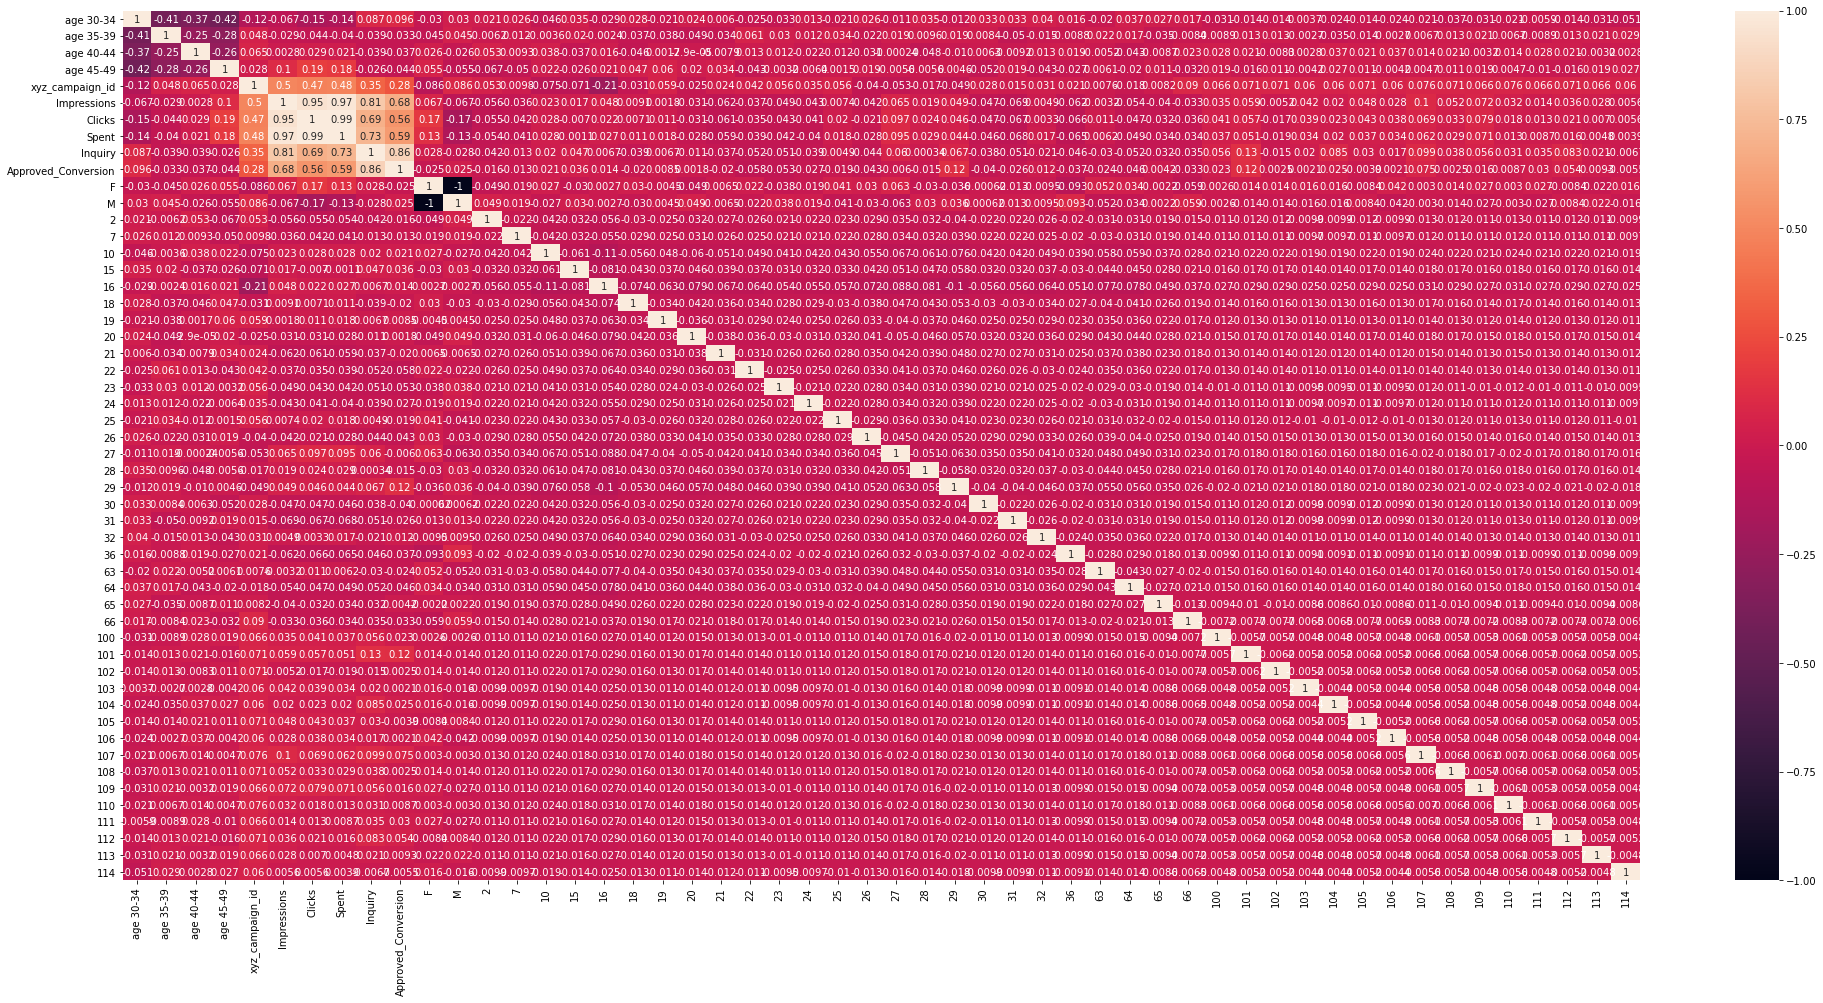

In [34]:
#As discussed, the number of variables is large and difficult to view the details in this plot.
plt.figure(figsize=(34,16)) #adjust size of heatmap
sns.heatmap(correlationAnalysis,annot=True) #print heatmap of correlations

Training Test Set

In [35]:
# import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# pick test_size to determine the size of the test set 
# pick the random state (the 'seed' used to ensure the same starting point each time the model is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [36]:
#print the shape of the test and training sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 51)
(343, 51)
(800,)
(343,)


Training

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression()

<AxesSubplot:>

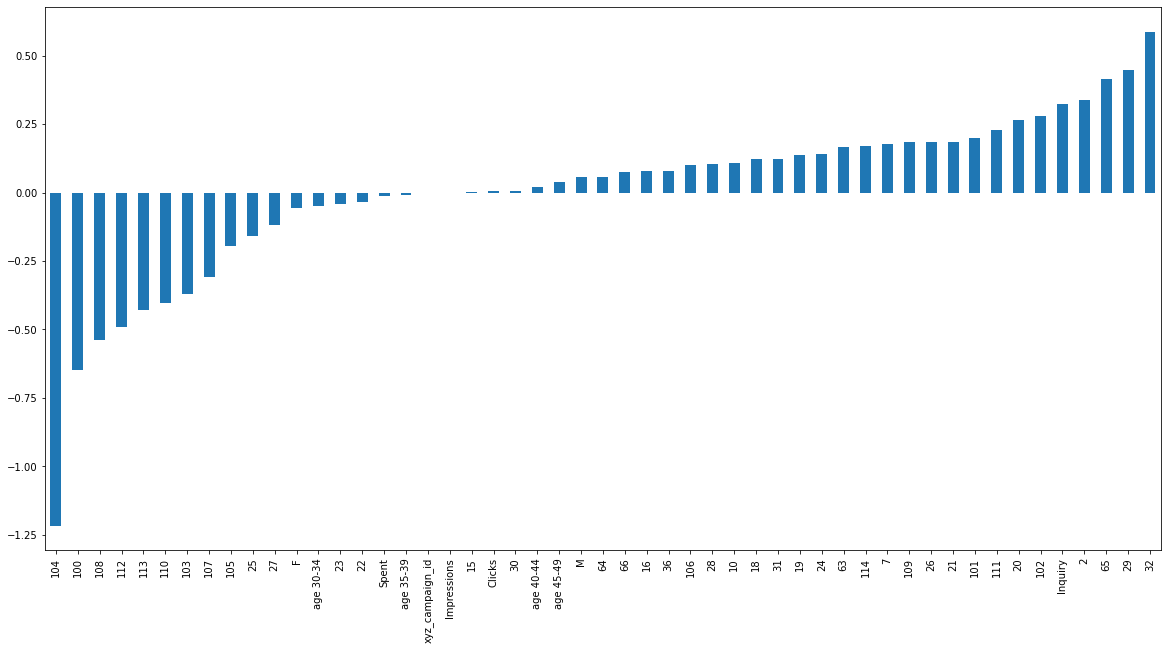

In [38]:
#look at coefficients to see which variables have a positive and negative correlation
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
plt.figure(figsize=(20,10))
coeff.plot(kind='bar')

In [39]:
y_pred = lr.predict(X_test)

Evaluation

In [40]:
from sklearn import metrics as mt

# calculate MSE- close to 0 is best
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# calculate R-Square, close to 1 is best
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 0.75
R-Square: 0.75


In [41]:
from math import sqrt
print(f'RMSE: {np.round(sqrt(mt.mean_squared_error(y_test, y_pred)), 4)}') #calculate the Root Mean Square error. 
#This is less than one which indicates a good model 

RMSE: 0.8638


Cross-validation

In [42]:
#check cross validation across 4 folds 
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X_train, y_train, cv=4))

[0.49360017 0.62490848 0.7592362  0.81225149]


In [43]:
import numpy as np
print(np.mean(cross_val_score(lr, X_train, y_train, cv=5))) #average across all splits

0.663672995526383


### Final modeling with Scikit Learn

In this final model I used the correlation information from the regression model that determined 17 variables that could be dropped from the model, based on a high P value. 

In this new model the R-Square didn't change, however the mean cross validation score improved, as can be seen in the cross valedation based on 4 folds, as did the mean square error. 

In [44]:
# including all columns from the dataset, excluding those 17 dropped according to the first model , dropping the dependent variable 
X = indep2.drop('constant', axis=1 )
y = dependent_vars #dependent varable approved conversions, as used in previous models

In [45]:
new_df = pd.concat([X, y], axis=1)

In [46]:
correlationAnalysis = new_df.corr()

<AxesSubplot:>

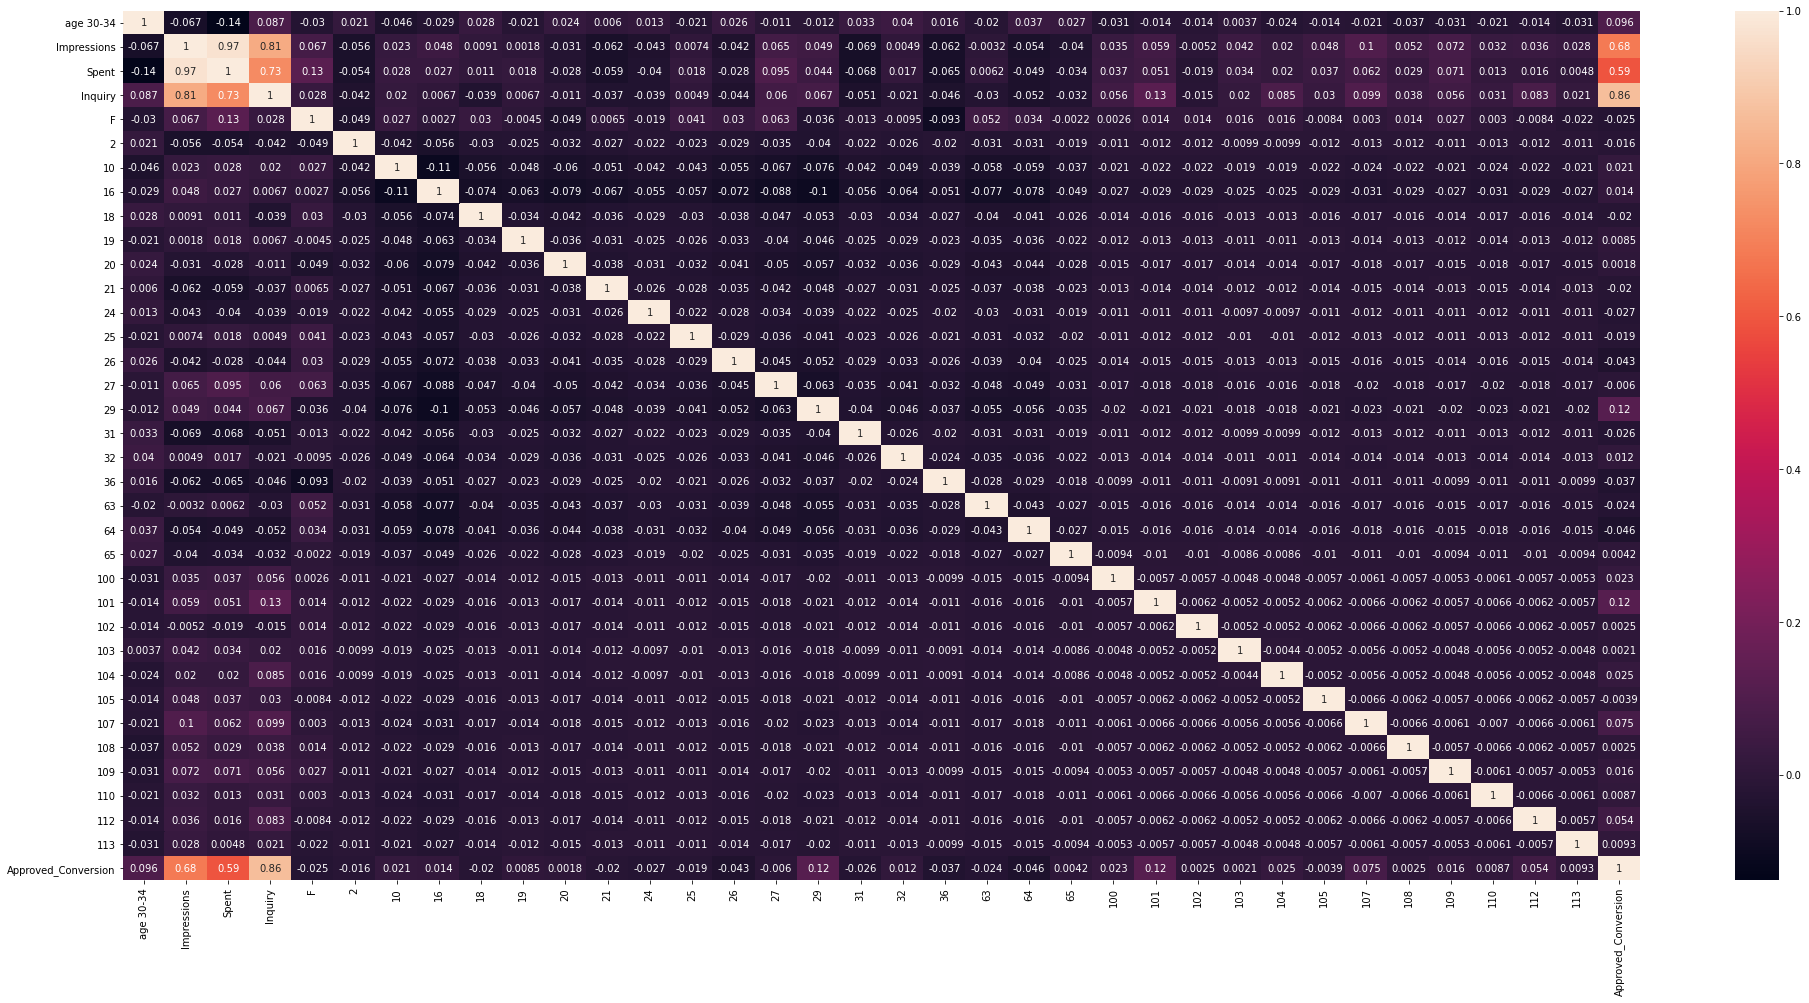

In [47]:
plt.figure(figsize=(34,16))
sns.heatmap(correlationAnalysis,annot=True)

In [48]:
new_df.corr()

,age 30-34,Impressions,Spent,Inquiry,F,2,10,16,18,19,...,103,104,105,107,108,109,110,112,113,Approved_Conversion
age 30-34,1.000000,-0.066877,-0.138037,0.086600,-0.030271,0.020812,-0.046067,-0.028580,0.028278,-0.021131,...,0.003742,-0.023675,-0.014122,-0.021305,-0.037315,-0.030954,-0.021305,-0.014122,-0.030954,0.095685
Impressions,-0.066877,1.000000,0.970386,0.812838,0.067059,-0.056264,0.022588,0.048375,0.009075,0.001829,...,0.041871,0.020289,0.048397,0.100311,0.052237,0.072032,0.031583,0.036496,0.027503,0.684249
Spent,-0.138037,0.970386,1.000000,0.725379,0.125022,-0.053746,0.027666,0.027476,0.011463,0.018121,...,0.033928,0.020009,0.037213,0.061888,0.029261,0.070753,0.013345,0.016043,0.004831,0.593178
Inquiry,0.086600,0.812838,0.725379,1.000000,0.027559,-0.041897,0.019547,0.006675,-0.038774,0.006650,...,0.019883,0.084961,0.030053,0.098712,0.037560,0.056370,0.030804,0.082600,0.021251,0.864034
F,-0.030271,0.067059,0.125022,0.027559,1.000000,-0.048501,0.026858,0.002729,0.030102,-0.004522,...,0.015645,0.015645,-0.008404,0.003013,0.014039,0.026837,0.003013,-0.008404,-0.021623,-0.025350
2,0.020812,-0.056264,-0.053746,-0.041897,-0.048501,1.000000,-0.042385,-0.055868,-0.029566,-0.025379,...,-0.009912,-0.009912,-0.011738,-0.012554,-0.011738,-0.010863,-0.012554,-0.011738,-0.010863,-0.015842
10,-0.046067,0.022588,0.027666,0.019547,0.026858,-0.042385,1.000000,-0.105896,-0.056041,-0.048104,...,-0.018788,-0.018788,-0.022250,-0.023797,-0.022250,-0.020590,-0.023797,-0.022250,-0.020590,0.020656
16,-0.028580,0.048375,0.027476,0.006675,0.002729,-0.055868,-0.105896,1.000000,-0.073867,-0.063406,...,-0.024764,-0.024764,-0.029327,-0.031366,-0.029327,-0.027140,-0.031366,-0.029327,-0.027140,0.013580
18,0.028278,0.009075,0.011463,-0.038774,0.030102,-0.029566,-0.056041,-0.073867,1.000000,-0.033555,...,-0.013105,-0.013105,-0.015520,-0.016599,-0.015520,-0.014363,-0.016599,-0.015520,-0.014363,-0.020098
19,-0.021131,0.001829,0.018121,0.006650,-0.004522,-0.025379,-0.048104,-0.063406,-0.033555,1.000000,...,-0.011249,-0.011249,-0.013322,-0.014248,-0.013322,-0.012329,-0.014248,-0.013322,-0.012329,0.008524


In [49]:
# importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# the 'test_size' parameter is where we'll change our ratio mentioned above
# 'random state' refers to the 'seed' used to ensure we have the same starting point each time we run this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)



In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 35)
(343, 35)
(800,)
(343,)


In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

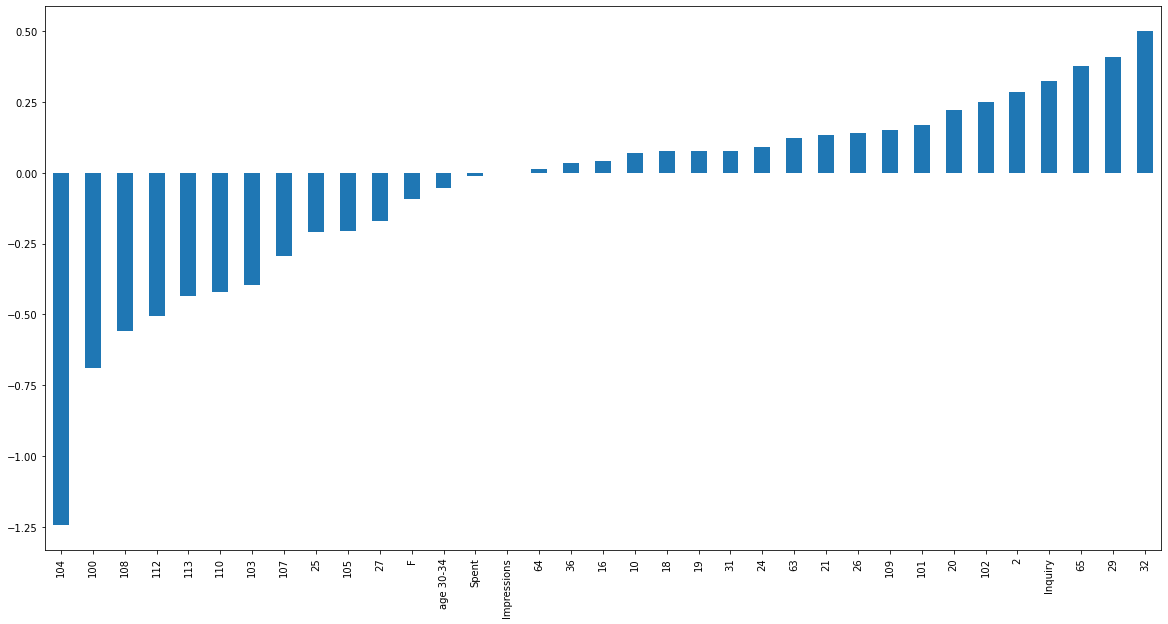

In [52]:
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
plt.figure(figsize=(20,10))
coeff.plot(kind='bar')

In [53]:
y_pred = lr.predict(X_test)

In [54]:
y_pred

array([ 6.64158212e-01,  6.33558718e-01,  5.95074926e-01,  5.11020177e-01,
        3.69104482e-01,  1.61273890e+00,  3.30558295e-01,  7.59933092e-01,
        6.62188299e-01,  1.67742562e-01,  7.54457738e-01,  1.61194099e+00,
        4.57802517e+00,  3.19122945e+00,  1.05509832e+00,  2.32169218e-01,
        5.10992531e-01,  8.25145315e-01,  7.59180205e+00,  3.09896760e-01,
        6.99276056e+00,  2.82262502e-01,  1.45403395e+00,  2.26201611e+00,
        3.33598586e-01,  3.83069839e-01,  6.16669369e-01,  4.28506751e-01,
        4.17111613e-01,  1.23776936e+00,  2.92408729e-01,  1.82596747e+00,
        2.88562609e-02,  9.62307345e-01,  4.47933457e-01,  6.98738675e-01,
        3.87682892e-01,  9.41493079e-01,  7.04008979e-01,  1.91590744e+00,
        3.59317294e-01,  2.91519025e-01,  6.06824420e-01,  5.07270460e-01,
        7.15105886e-01,  3.47037808e-01,  1.23012536e+00,  2.36226778e+00,
        3.74398917e-01,  2.48687150e-01,  2.93321106e-01,  3.64593803e+00,
        3.66503128e-02,  

In [55]:
import numpy as np
from sklearn import metrics as mt

# MSE -  closer to 0 is best
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# R-Square closer to 1 is best
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 0.74
R-Square: 0.75


In [56]:
from math import sqrt
print(f'RMSE: {np.round(sqrt(mt.mean_squared_error(y_test, y_pred)), 4)}') #calculate the Root Mean Square error. 
#This is less than one which indicates a good model 

RMSE: 0.8575


In [57]:
#check cross validation across 4 folds 
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X_train, y_train, cv=4))

[0.52741275 0.65022744 0.76450142 0.8196594 ]


In [58]:
print(np.mean(cross_val_score(lr, X_train, y_train, cv=5)))

0.6806956320867869


### Recommendations

Based on this analysis I would suggest that for future social media marketing campaigns for similar products from Xyz Company their targeting be focused on:
Age group 30-34
Females, though not an incredibly high correlation), should be used with caution and not to only target one gender. 
Based on the final model there are 30 interest targets that could be used in future targeting. I would suggest running numerous 6 ads with a 5 interests each, within one campaign and evaluate the success of these interest targets further. 
Spend does have a significant correlation with Approved conversions, however, the amount spent was unsurprisingly also closely correlated to impressions. 
Of course,  inquiry is very closely related to purchases, this could suggest that direct engagement on a personal level is useful in promoting sales. Implementations that could be considered include a chat function on the site, promoting form inquiries on social channels, and other direct engagement methods. 

**Ethics and Considerations:**
This analysis is not an indication of a general customer profile or an illustration of customers that are most likely to purchase for all ad campaigns or products. Consideration should be paid to the demographics of those using the social media platform the ads appeared on. Other considerations could be paid to the probability of demographics response to ads on the platform, as well as socioeconomic factors, competition at the time of ad placement, time of year, and more. 
Further analysis could be conduction on the number of unique impressions, clicks, inquiries, and purchases and not on total numbers alone.  
Ethically, this data set is anonymous and doesn’t contain information that could be traced to a company. Further, by eliminating the keywords of the Facebook interests and using numeric values it assists in removing bias in the analysis. 
